In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def is_day(frame):
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    lower_blue = np.array([80, 0, 50])
    upper_blue = np.array([120, 255, 255])
    mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)

    lower_yellow = np.array([20, 100, 100])
    upper_yellow = np.array([30, 255, 255])
    mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)

    lower_orange = np.array([10, 100, 100])
    upper_orange = np.array([20, 255, 255])
    mask_orange = cv2.inRange(hsv, lower_orange, upper_orange)

    day_mask = mask_blue | mask_yellow | mask_orange
    day_pixels = cv2.countNonZero(day_mask)
    total_pixels = frame.shape[0] * frame.shape[1]

    return (day_pixels / total_pixels) > 0.2

In [30]:
def is_night(frame):
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower_dark = np.array([0, 0, 0])
    upper_dark = np.array([180, 255, 50])
    mask_dark = cv2.inRange(hsv, lower_dark, upper_dark)

    dark_pixels = cv2.countNonZero(mask_dark)
    total_pixels = frame.shape[0] * frame.shape[1]

    return (dark_pixels / total_pixels) > 0.5

In [31]:
def is_twilight(frame):
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower_twilight1 = np.array([0, 50, 50]) 
    upper_twilight1 = np.array([20, 255, 255])
    mask_twilight1 = cv2.inRange(hsv, lower_twilight1, upper_twilight1)

    lower_twilight2 = np.array([160, 50, 50]) 
    upper_twilight2 = np.array([180, 255, 255])
    mask_twilight2 = cv2.inRange(hsv, lower_twilight2, upper_twilight2)

    twilight_mask = mask_twilight1 | mask_twilight2
    twilight_pixels = cv2.countNonZero(twilight_mask)
    total_pixels = frame.shape[0] * frame.shape[1]

    return (twilight_pixels / total_pixels) > 0.1

In [32]:
def annotate_frame(frame, text, position):
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1
    color = (255, 255, 255)
    thickness = 2
    cv2.putText(frame, text, position, font, font_scale, color, thickness, cv2.LINE_AA)

In [33]:
# Initialize video capture
cam_file = cv2.VideoCapture("Sunrise_and_Sunset_Timelapse.mp4")

day_duration = 0
night_duration = 0
twilight_duration = 0
frame_count = 0
fps = cam_file.get(cv2.CAP_PROP_FPS)

while True:
    ret, frame = cam_file.read()
    if not ret:
        break

    if is_day(frame):
        day_duration += 1
    elif is_twilight(frame):
        twilight_duration += 1
    elif is_night(frame):
        night_duration += 1

    frame_count += 1

    total_duration = day_duration + night_duration + twilight_duration
    day_percentage = (day_duration / total_duration) * 100 if total_duration > 0 else 0
    twilight_percentage = (twilight_duration / total_duration) * 100 if total_duration > 0 else 0
    night_percentage = (night_duration / total_duration) * 100 if total_duration > 0 else 0

    annotate_frame(frame, f"Day: {day_percentage:.2f}%", (10, 30))
    annotate_frame(frame, f"Twilight: {twilight_percentage:.2f}%", (10, 70))
    annotate_frame(frame, f"Night: {night_percentage:.2f}%", (10, 110))

    cv2.imshow("Day 'N' Night Transition Analysis", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cam_file.release()
cv2.destroyAllWindows()

In [34]:
day_duration_seconds = day_duration / fps
night_duration_seconds = night_duration / fps
twilight_duration_seconds = twilight_duration / fps

print(f"Day duration: {day_duration_seconds:.2f} seconds")
print(f"Twilight duration: {twilight_duration_seconds:.2f} seconds")
print(f"Night duration: {night_duration_seconds:.2f} seconds")

Day duration: 100.10 seconds
Twilight duration: 19.13 seconds
Night duration: 76.63 seconds


In [35]:
# Analytics: Plotting bar graph and pie chart
labels = ['Day', 'Twilight', 'Night']
durations = [day_duration_seconds, twilight_duration_seconds, night_duration_seconds]

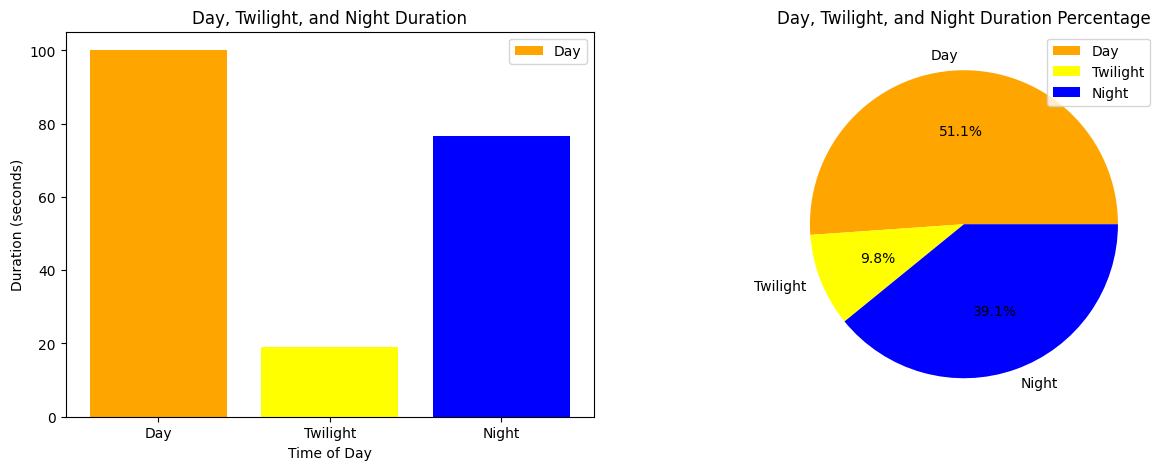

In [36]:
# Subplots for Bar Graph and Pie Chart
plt.figure(figsize=(15, 5))

# Bar Graph
plt.subplot(1, 2, 1)
plt.bar(labels, durations, color=['orange', 'yellow', 'blue'])
plt.xlabel('Time of Day')
plt.ylabel('Duration (seconds)')
plt.title('Day, Twilight, and Night Duration')
plt.legend(labels)

# Pie Chart
plt.subplot(1, 2, 2)
plt.pie(durations, labels=labels, autopct='%1.1f%%', colors=['orange', 'yellow', 'blue'])
plt.title('Day, Twilight, and Night Duration Percentage')
plt.legend(labels, loc="best")

# Show the plots
plt.show()
